In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("datasets.csv")
df.head(30)

,Unnamed: 0,studentID,personal_statement,award_name,award_classification
0,0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,8,19969003,-,Record of achievement,CRPASS
9,9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST


## VIEW INFO ABOUT DATA AND CLEAN THE DATA

In [3]:
df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [4]:
# View size of data
df.shape

(16769, 5)

In [5]:
# view info about data, showing its null and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16769 entries, 0 to 16768
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            16769 non-null  int64 
 1   studentID             16769 non-null  int64 
 2   personal_statement    16768 non-null  object
 3   award_name            16769 non-null  object
 4   award_classification  16769 non-null  object
dtypes: int64(2), object(3)
memory usage: 655.2+ KB


In [6]:
# from the info above, there is a column name Unnamed that isn't needed, so we drop it.

df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.columns

Index(['studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [9]:
# view data
df.head()

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST


In [10]:
# check for duplicates counts because there are duplicates.
df.duplicated().sum()

7395

In [11]:
# drop all duplicates and leave only first occurance of data

df = df.drop_duplicates(keep='first')
df.shape

(9374, 4)

In [12]:
# Check for NaN values
df.isnull().sum()

studentID               0
personal_statement      1
award_name              0
award_classification    0
dtype: int64

In [13]:
df['personal_statement'].isnull().values.any()

True

In [14]:
df[df.isna().any(axis=1)]

,studentID,personal_statement,award_name,award_classification
8891,201803289,NaN,Bachelor of Science with Honours,2:1


In [15]:
# since the row has no personal statement, we can drop it.
# NB: If there were many rows with no available personal statement, treating them differently will be better than dropping them.
print(f'Before dropping NA, shape is: {df.shape}')
df.dropna(inplace=True)
print(f'After dropping NA, shape is: {df.shape}')

Before dropping NA, shape is: (9374, 4)
After dropping NA, shape is: (9373, 4)


In [16]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,19969003,-,Record of achievement,CRPASS
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
11,199922311,I want to teach because I want to share my lov...,Record of achievement,CRPASS
12,199926834,Why I am applying for adult nursing: Working i...,Record of achievement,CRPASS


In [17]:
# Get data where award names containes 'Bachelor' irrespective of the bachelor type.
df = df[df['award_name'].str.contains('Bachelor')]

df.shape

(5781, 4)

In [18]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,FIRST
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,FIRST
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,FIRST
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,2:1
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,THIRD
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,2:2
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,2:2
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,FIRST


In [19]:
# Get all unique awards

unique_awards = df['award_name'].unique()

len(unique_awards)

14

In [20]:
unique_awards

array(['Bachelor of Medicine and Bachelor of Surgery with Honours',
       'Bachelor of Science with Honours',
       'Bachelor of Arts with Honours', 'Bachelor of Arts',
       'Bachelor of Engineering with Honours', 'Bachelor of Science',
       'Bachelor of Laws with Honours',
       'Bachelor of Education with Honours',
       'Bachelor of Science (Economics) with Honours',
       'Bachelor of Philosophy with Honours', 'Bachelor of Engineering',
       'Bachelor of Music with Honours',
       'Bachelor of Business Administration with Honours',
       'Bachelor of Laws'], dtype=object)

In [21]:
# Get all unique awards_classification

award_classification = df['award_classification'].unique()

len(award_classification)

8

In [22]:
award_classification 

array(['HONS', 'FIRST', '2:1', 'THIRD', '2:2', 'ORD', 'PASS', 'MBPASS'],
      dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 7 to 16712
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   studentID             5781 non-null   int64 
 1   personal_statement    5781 non-null   object
 2   award_name            5781 non-null   object
 3   award_classification  5781 non-null   object
dtypes: int64(1), object(3)
memory usage: 225.8+ KB


## 2. EXPLORATORY DATA ANALYSIS

In [24]:
# Knowing frequencies of award

df['award_name'].value_counts()

Bachelor of Science with Honours                             2597
Bachelor of Arts with Honours                                2497
Bachelor of Engineering with Honours                          319
Bachelor of Laws with Honours                                 247
Bachelor of Science                                            41
Bachelor of Arts                                               32
Bachelor of Education with Honours                             12
Bachelor of Music with Honours                                 12
Bachelor of Philosophy with Honours                            11
Bachelor of Engineering                                         4
Bachelor of Laws                                                4
Bachelor of Medicine and Bachelor of Surgery with Honours       2
Bachelor of Business Administration with Honours                2
Bachelor of Science (Economics) with Honours                    1
Name: award_name, dtype: int64

In [25]:
# Knowing frequencies of award classification

df['award_classification'].value_counts()

2:1       2652
FIRST     1908
2:2       1012
THIRD      126
ORD         79
PASS         2
HONS         1
MBPASS       1
Name: award_classification, dtype: int64

In [26]:
# Encoding the data labels to numerical category
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X = text

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(df['award_classification'])
df['award_classification'] = encoder.fit_transform(df['award_classification'])
# encoded_target[:50]
df.head(20)

,studentID,personal_statement,award_name,award_classification
7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,3
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,7
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2


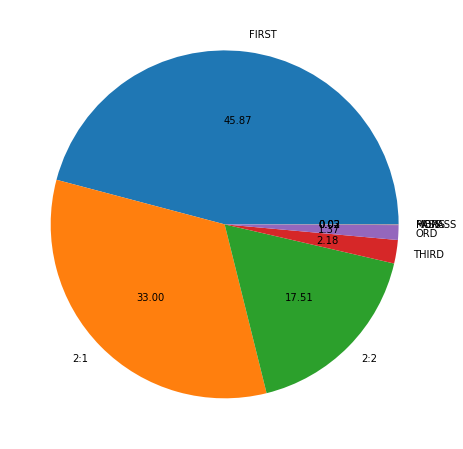

In [34]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
plt.pie(df['award_classification'].value_counts(), labels=['FIRST', '2:1','2:2','THIRD','ORD', 'PASS','HONS','MBPASS'], autopct="%0.2f")
plt.show()